In [1]:
import math
import fluids
from fluids.units import *

import thermo
from thermo.chemical import Chemical

Given:  Water at 180 degF is flowing through a flat heating coil at a rate of 15 gallons per minute
Find:  The pressure drop from point A to B
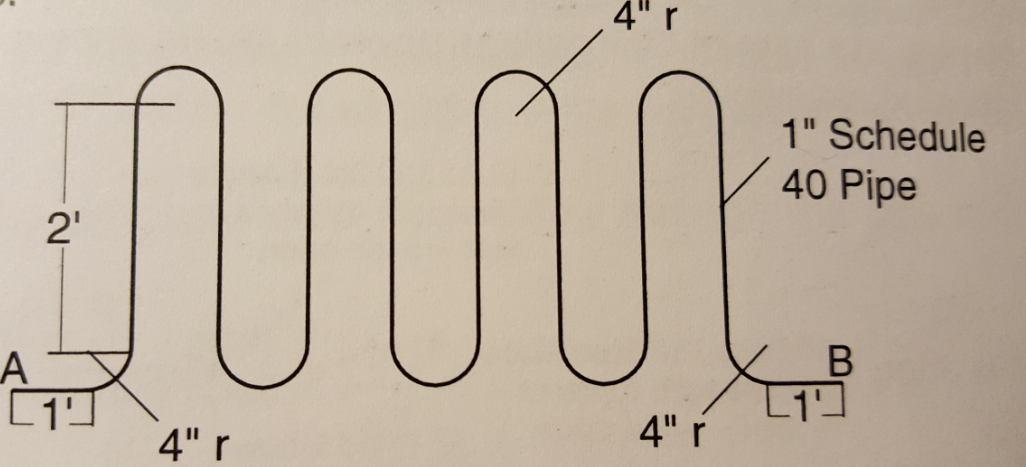

In [2]:
P = (1*u.atm).to(u.Pa)
T = (180*u.degF).to(u.degK)
water = Chemical('water', P=P.magnitude, T=T.magnitude)

rho = water.rho*u.kg/u.meter**3
rho = rho.to(u.lb/u.feet**3)

mu = water.mu*1000*u.cP

d = nearest_pipe(NPS=1*u.inch, schedule='40')[1]
d = d.to(u.inch)

Q = 15*u.gallon/u.minute

print(rho, P, T, mu, d, Q)

60.44398854519912 pound / foot ** 3 101325.0 pascal 355.37222199999997 kelvin 0.3453238086174401 centipoise 1.0488188976377952 inch 15.0 gallon / minute


# Re

In [3]:
Re = 50.66*Q*rho/(d*mu)
Re = Re.magnitude
Re

126818.47693257024

Re is in the complete turbulent zone.

# Solve for Ks

In [4]:
#K for pipe
e = roughness_Farshad('Carbon steel, bare', D=d.to(u.meter))
f = friction_factor(Re=Re, eD=e/d.to(u.meter))  #friction factor for 1" pipe

L=18*u.feet #ignoring the length of the bends for now
D = d.to(u.feet) 

K = f*L/D
Kpipe = K
Kpipe

<Quantity(4.703762714136374, 'dimensionless')>

In [5]:
# K for 90 deg bends
ft = 0.022 #Crane 410, A-27
K = 14*ft #for 4" radius r/d=4
K90bends = 2*K
K90bends

0.616

In [6]:
#K for 180 deg bends
n = 2 #number of 90 deg bends
rd = 4 #r/d to 4/1
K = (n-1)*(0.25*math.pi*ft*rd + 0.5*K90bends/n) + K90bends/n
K180bends = 7*K
K180bends

3.7178052686528282

In [7]:
#K total
Ktot = Kpipe + K90bends + K180bends
Ktot

<Quantity(9.037567982789202, 'dimensionless')>

# Delta P

In [8]:

deltaP = ((1.801e-5)*Ktot*rho*Q**2/(d**4)).magnitude*u.psi
deltaP.round(2)

<Quantity(1.83, 'pound_force_per_square_inch')>